In [2]:
from sklearn import datasets
from sklearn import svm
from sklearn import model_selection
from sklearn import metrics

data =datasets.load_digits()
print(type(data))

<class 'sklearn.utils._bunch.Bunch'>


In [3]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
x=data.data
print(x.shape)
y=data.target
print(y.shape)

(1797, 64)
(1797,)


<class 'numpy.ndarray'>
(1797, 8, 8)


(-0.5, 7.5, 7.5, -0.5)

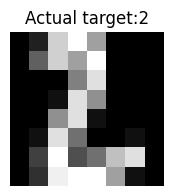

In [5]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt
# visualise the data images
images = data.images
y = data.target
print(type(images))
print(images.shape)
num = 1270
samples_im = images[num,:,:]
label = y[num]
plt.figure(1,(2,2))
plt.imshow(samples_im,cmap='gray')
plt.title("Actual target:"+str(label))
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

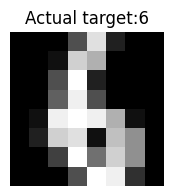

In [6]:
num = 34
samples_im=images[num,:,:]
label=y[num]
plt.figure(1,(2,2))
plt.imshow(samples_im,cmap='gray')
plt.title("Actual target:"+str(label))
plt.axis('off')

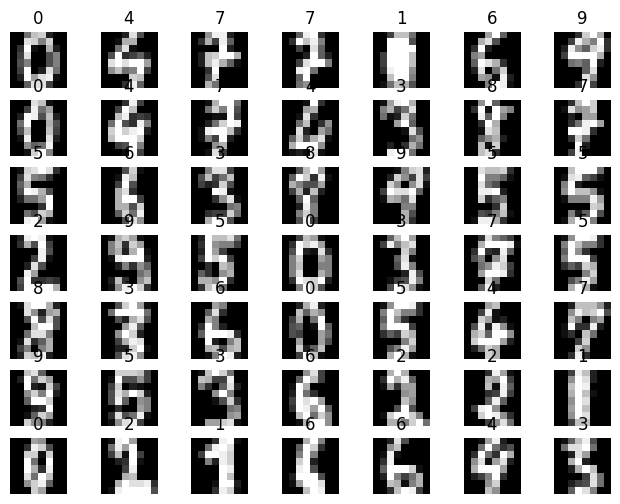

In [7]:
import numpy as np
images=data.images
y=data.target

for i in range(49):
  samp=np.random.randint(0,1797)
  samples_im = images[samp,:,:]
  label=y[samp]
  plt.figure(1,(8,6))
  plt.subplot(7,7,i+1)
  plt.imshow(samples_im,cmap='gray')
  plt.title(str(label))
  plt.axis('off')

In [8]:
ratio = 0.3 # 0.3 stands for 30% testing ratio
xtrain,xtest,ytrain,ytest= model_selection.train_test_split(x,y,test_size=ratio,random_state=5)
print("Training dataset")
print(xtrain.shape,ytrain.shape)
print("Testing Dataset")
print(xtest.shape,ytest.shape)

Training dataset
(1257, 64) (1257,)
Testing Dataset
(540, 64) (540,)


In [9]:
clf_model = svm.SVC() # classification model

# train the model using the trianing data (Xtrain) and its respective labels (ytrain)
clf_model = clf_model.fit(xtrain,ytrain)


# predict the labels of the testing dataset
# pass the test data (Xtest) in the trained model
ypred = clf_model.predict(xtest)


print(ypred.shape)
print(ytest.shape)

(540,)
(540,)


In [10]:
acc = metrics.accuracy_score(ypred,ytest)

conf_matrix = metrics.confusion_matrix(ypred,ytest)

report = metrics.classification_report(ypred,ytest)

print('Accuracy of the system: ', acc)
print(' Confusion matrix of the model ')
print(conf_matrix)
print("Complete report ")
print(report)

Accuracy of the system:  0.9851851851851852
 Confusion matrix of the model 
[[58  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  0  0  0  0  0  1  0]
 [ 0  0 58  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  1  0 63  0  0  0  1]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0  0 58  0  0]
 [ 0  0  0  1  0  0  0  0 48  1]
 [ 0  0  0  0  0  1  0  1  1 48]]
Complete report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      0.98      0.99        53
           2       1.00      1.00      1.00        58
           3       0.97      1.00      0.98        57
           4       1.00      1.00      1.00        43
           5       0.98      0.97      0.98        65
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        58
           8       0.96      0.96      0.96        50
           9       0.96      0.94  

Text(0.5, 1.0, 'Confusion matrix for digit dataset')

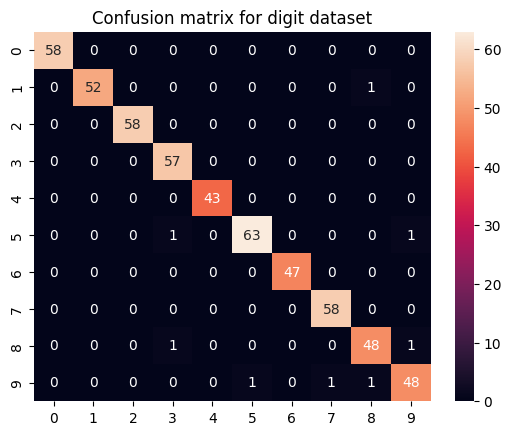

In [11]:
import seaborn as sns
plt.figure(1)
sns.heatmap(conf_matrix,annot=True)
plt.title("Confusion matrix for digit dataset")

In [12]:
# load the iris dataset
# understand the datset from its DESCR
# and implement the 60:40 and 70:30 ratio train test split
# and compare its acc, precision, recall and f1_score
# for each split

In [13]:
from sklearn import metrics,datasets,model_selection,svm
data = datasets.load_iris()

X = data.data
y = data.target
Result = np.zeros((2,4))
ratio= [0.4,0.3]
for i in range(len(ratio)):
  Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=ratio[i],random_state=5)
  # create the model
  clf_model = svm.SVC()
  # train the model
  clf_model = clf_model.fit(Xtrain,ytrain)
  # test the model
  ypred = clf_model.predict(Xtest)

  # accuracy
  temp_acc = metrics.accuracy_score(ypred,ytest)
  # precision
  temp_pre = metrics.precision_score(ypred,ytest,average='macro')
  # recall
  temp_rec = metrics.recall_score(ypred,ytest,average='macro')
  # f1 score
  temp_f1 = metrics.f1_score(ypred,ytest,average='macro')

  list_result = [temp_acc,temp_pre,temp_rec,temp_f1]
  Result[i,:]=list_result

print(Result)
res = ['Accuracy','Precision','Recall','F1_score']

import pandas as pd
res_df = pd.DataFrame(Result,columns=res,index=['60:40','70:30'])
print(res_df)

[[0.98333333 0.98412698 0.98333333 0.98332291]
 [0.97777778 0.97916667 0.97777778 0.97775306]]
       Accuracy  Precision    Recall  F1_score
60:40  0.983333   0.984127  0.983333  0.983323
70:30  0.977778   0.979167  0.977778  0.977753


<Axes: >

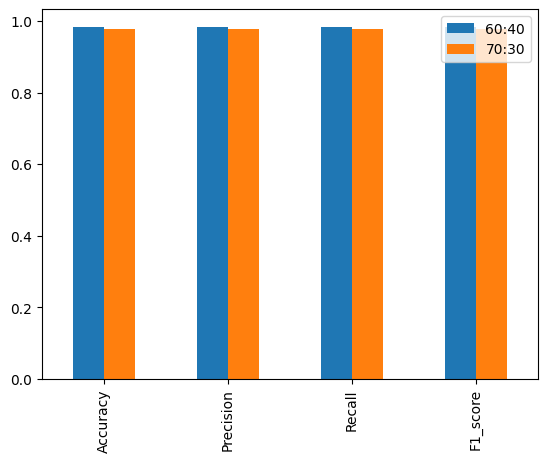

In [14]:
res_df.T.plot(kind = 'bar')